In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt


In [2]:
t=np.linspace(0,2,1000)
sin1=[]
sin2=[]
sinSum=[]


In [3]:
#  Let the first sin function be 10sin(10*pi*t)
# Here f1 = 5
def sinAngle_1(t):
    return np.sin(10*math.pi*t)*10

#  Let the second sin function be 5sin(6*pi*t)
# Here f1 = 10
def sinAngle_2(t):
    return np.sin(6*math.pi*t)*5

In [4]:
for i in range(len(t)):
    sin1.append(sinAngle_1(t[i]))    
    
for i in range(len(t)):
    sin2.append(sinAngle_2(t[i]))    

Text(0.5, 1.0, 'Sin1(t)')

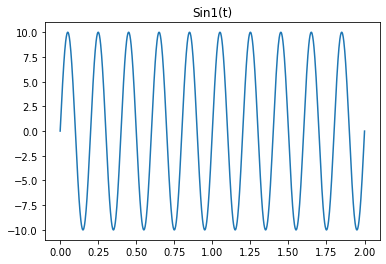

In [5]:
plt.plot(t,sin1)
plt.title('Sin1(t)')

Text(0.5, 1.0, 'Sin2(t)')

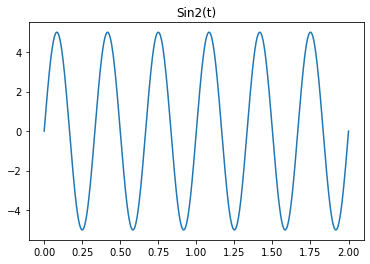

In [6]:
plt.plot(t,sin2)
plt.title('Sin2(t)')

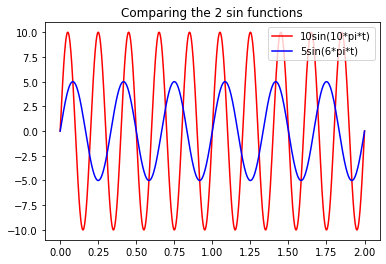

In [7]:
# Plotting both the curves simultaneously
plt.plot(t, sin1, color='r', label='10sin(10*pi*t)')
plt.plot(t, sin2, color='b', label='5sin(6*pi*t)')
  
# Naming the x-axis, y-axis and the whole graph

plt.title("Comparing the 2 sin functions")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [8]:
for i in range(len(t)):
    sinSum.append(sin1[i]+sin2[i])
    
    

Text(0.5, 1.0, 'Sin1(t)+sin2(t)')

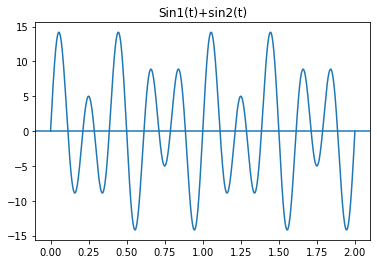

In [9]:
plt.plot(t,sinSum)
plt.axhline(0)
plt.title('Sin1(t)+sin2(t)')

In [10]:
#calculating the fft
from scipy.fftpack import fftfreq
from scipy.fftpack import fft, ifft
# FFT the signal
sig_fft = fft(sinSum)


Text(0.5, 1.0, 'Convolution of the net signal with one of the component of the signal ')

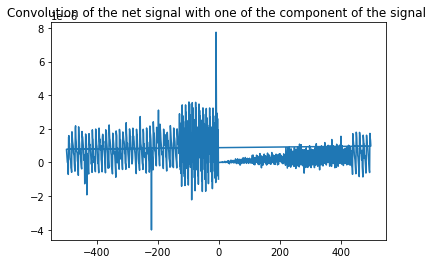

In [20]:

freq = fftfreq(len(sinSum), d=1./1000)
#Taking the convolution of the net signal with one of the sin wave

ft1=[]

for i in range(len(freq)):
    temp=0
    for j in range(len(sinSum)):
        temp=temp+(sinSum[j])*(5*np.sin(6*math.pi*i*j))
        
    ft1.append(abs(temp))
    
plt.plot(freq,ft1)
#plt.xlim(0,300)
plt.title('Convolution of the net signal with one of the component of the signal ')   




Text(0.5, 1.0, 'Convolution of the net signal with the other component of the signal ')

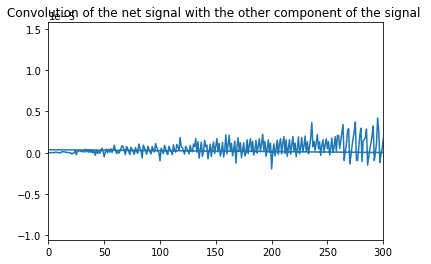

In [17]:
ft2=[]

for i in range(len(freq)):
    temp=0
    for j in range(len(sinSum)):
        temp=temp+(sinSum[j])*(10*np.sin(10*math.pi*i*j))
        
    ft2.append(temp)
    
plt.plot(freq,ft2)
plt.xlim(0,300)
plt.title('Convolution of the net signal with the other component of the signal ')   

/tmp/ipykernel_4731/69927399.py:3: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(freq, np.abs(sig_fft), 'b', markerfmt=" ", basefmt="-b")


Text(0, 0.5, 'FFT Amplitude')

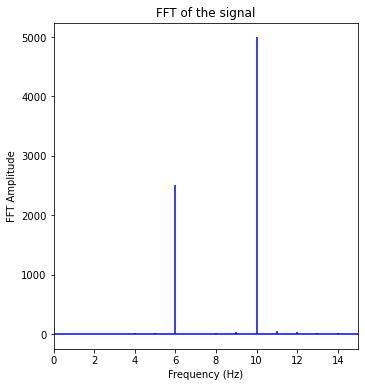

In [18]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', markerfmt=" ", basefmt="-b")
plt.title('FFT of the signal')
plt.xlim(0, 15)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')

In [19]:
peakFreq=[]
for i in range(len(sig_fft)):
    if abs(sig_fft[i]) > 1500:
        peakFreq.append(abs(freq[i]))

print(peakFreq)
    

[6.0, 10.0, 10.0, 6.0]


In [15]:
# From the FFT of the signal we can see that the peak occured at the frequency 6 Hz and 10 hz, we can tell that the net signal has 2 components with frequencies 6 Hz and 10Hz.